# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive
functions
4.	Married - This refers to applicant being in a state of matrimony
5.	Dependents - This refres to persons who depends on the applicants for survival
6.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
7.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
8.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
9.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
10.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
11.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
12.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
13.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
14.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

to remove the null values, for float data types we use mean of remaining data and for object data types we use mode of remaining data

In [5]:
from statistics import mode
df['LoanAmount']=df['LoanAmount'].replace('',np.nan)
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))

df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace('',np.nan)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

df['Credit_History']=df['Credit_History'].replace('',np.nan)
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

df['Gender']=df['Gender'].replace('',np.nan)
df['Gender']=df['Gender'].fillna(mode(df['Gender']))

df['Married']=df['Married'].replace('',np.nan)
df['Married']=df['Married'].fillna(mode(df['Married']))

df['Dependents']=df['Dependents'].replace('',np.nan)
df['Dependents']=df['Dependents'].fillna(mode(df['Dependents']))

df['Self_Employed']=df['Self_Employed'].replace('',np.nan)
df['Self_Employed']=df['Self_Employed'].fillna(mode(df['Self_Employed']))

In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Vizualisation of data

In [8]:
Columns =[]
Columns = df.columns
Columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000  

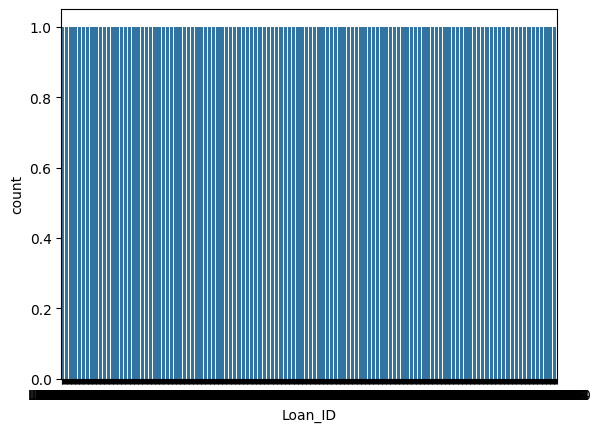

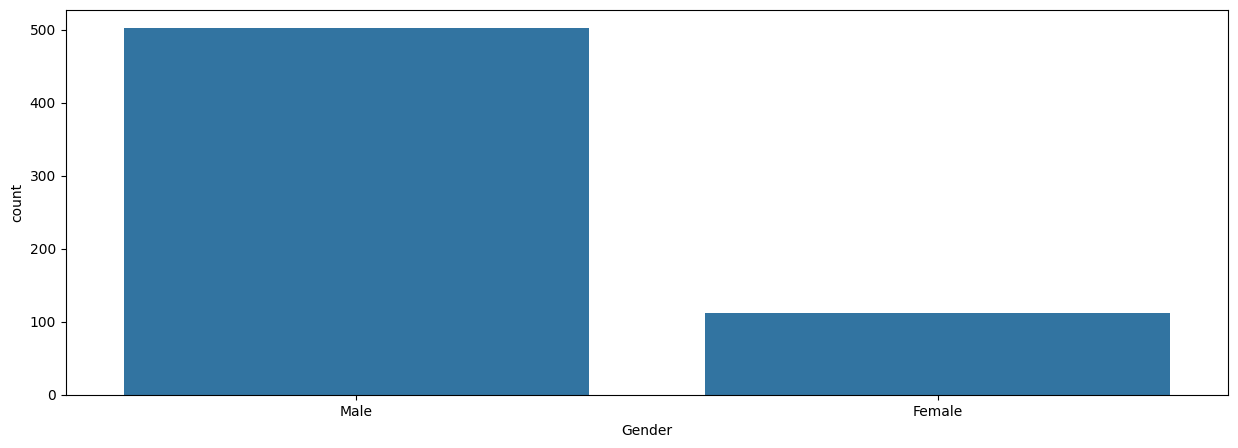

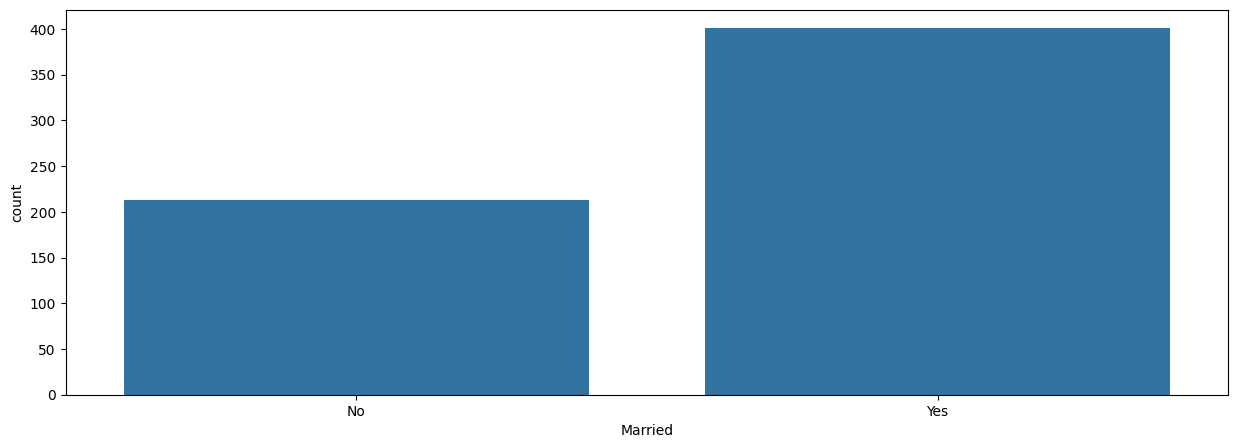

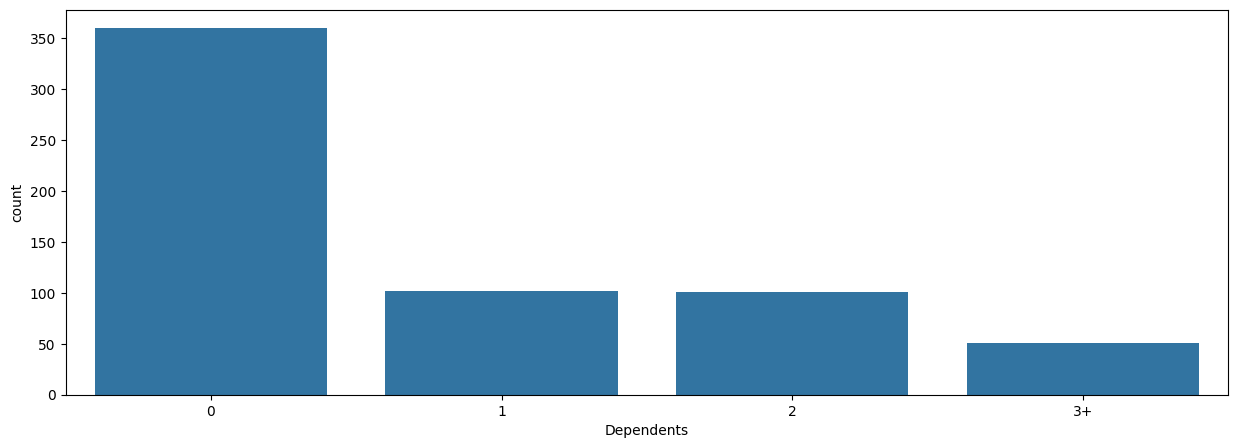

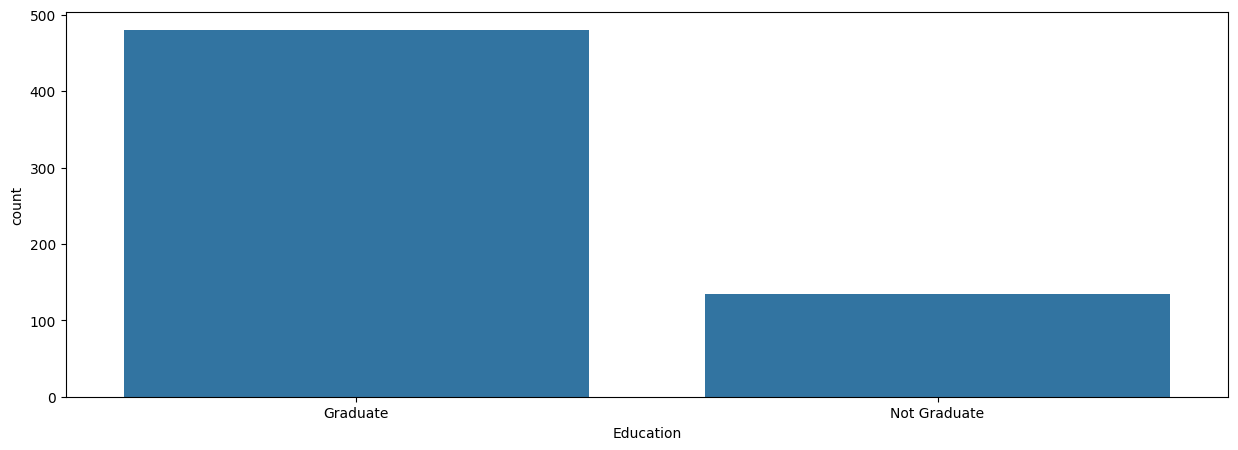

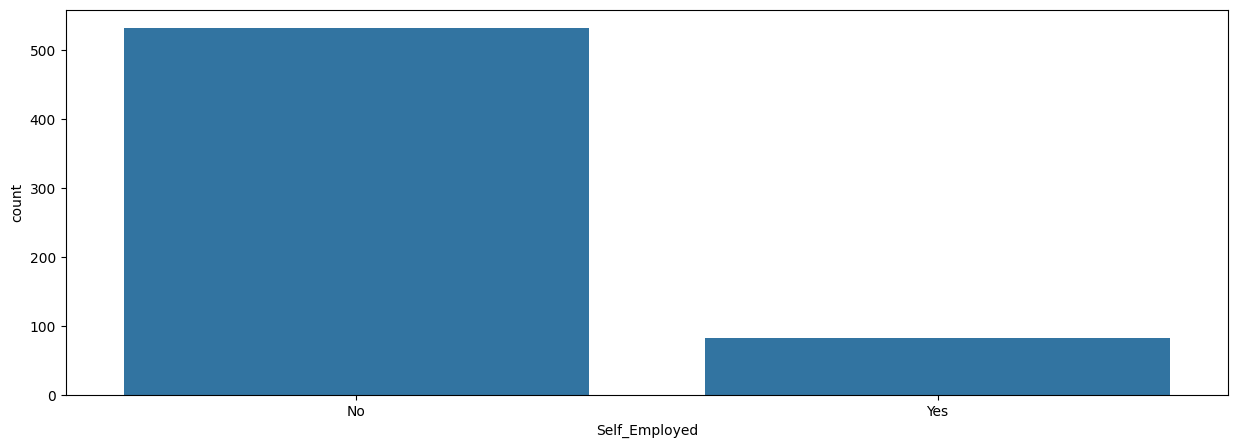

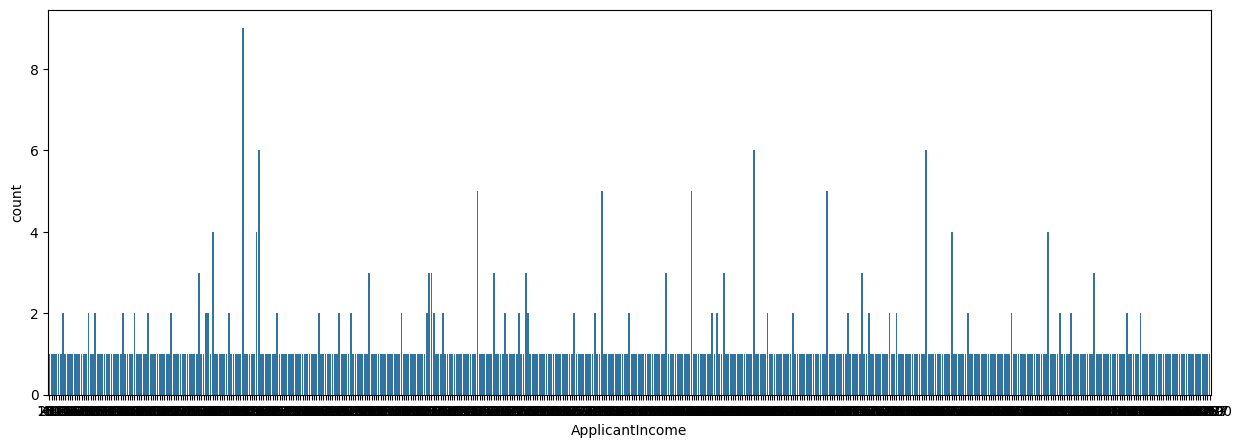

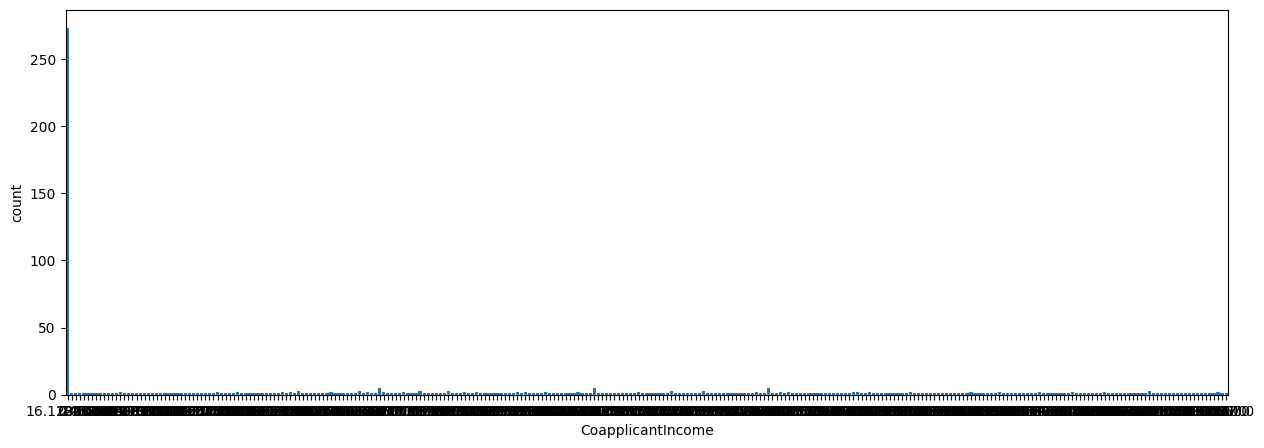

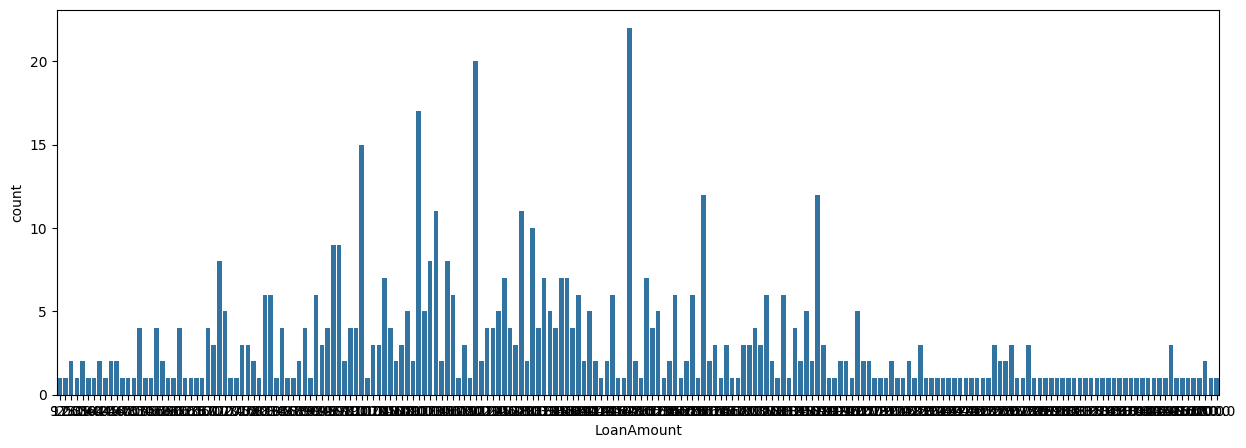

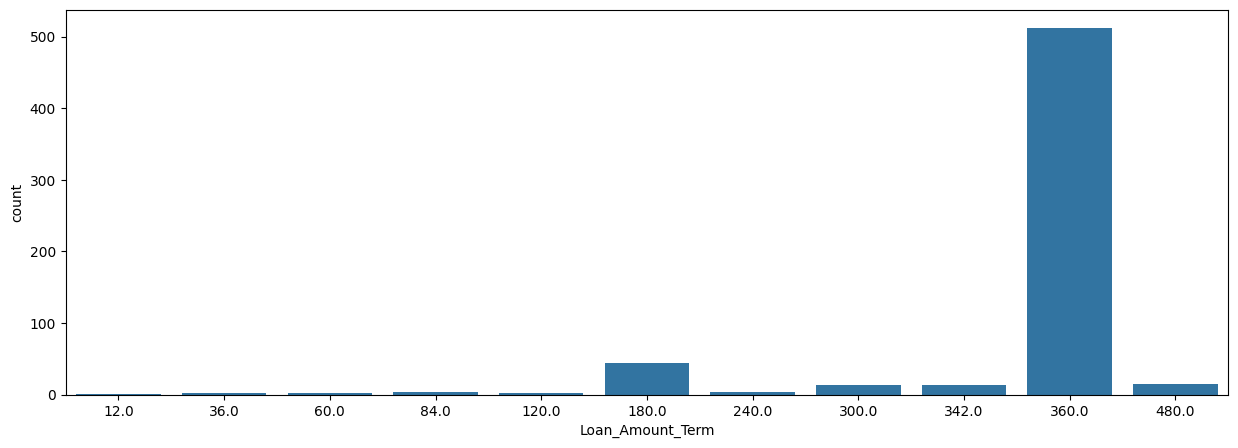

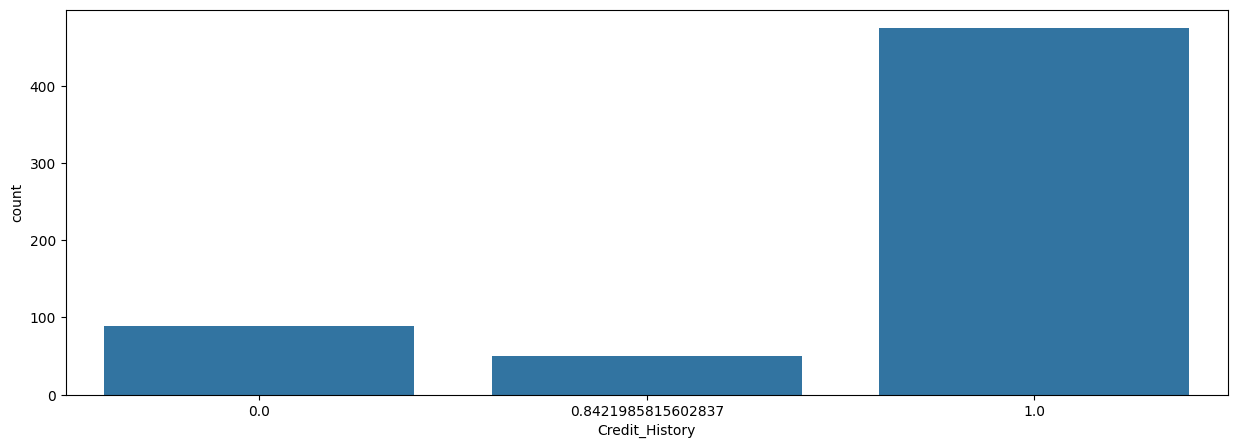

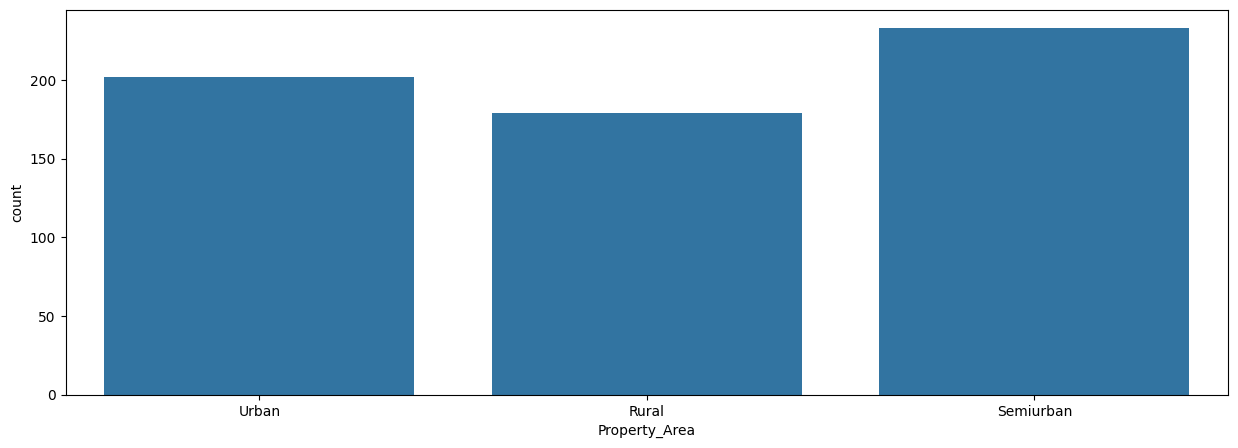

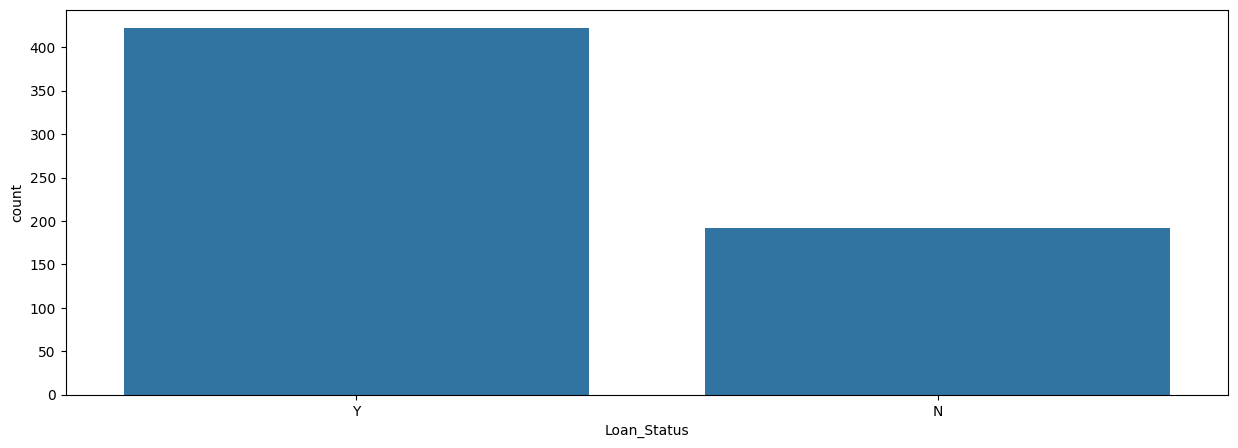

<Figure size 1500x500 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
for i in Columns:
    print(df[i].value_counts())
    ax = sns.countplot(x=i,data=df)
    plt.figure(figsize=(15,5))

We need to encode the columns that have object type data

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [11]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

we don't need loan id column

In [12]:
df1 = df.drop('Loan_ID', axis=1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [14]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<Axes: >

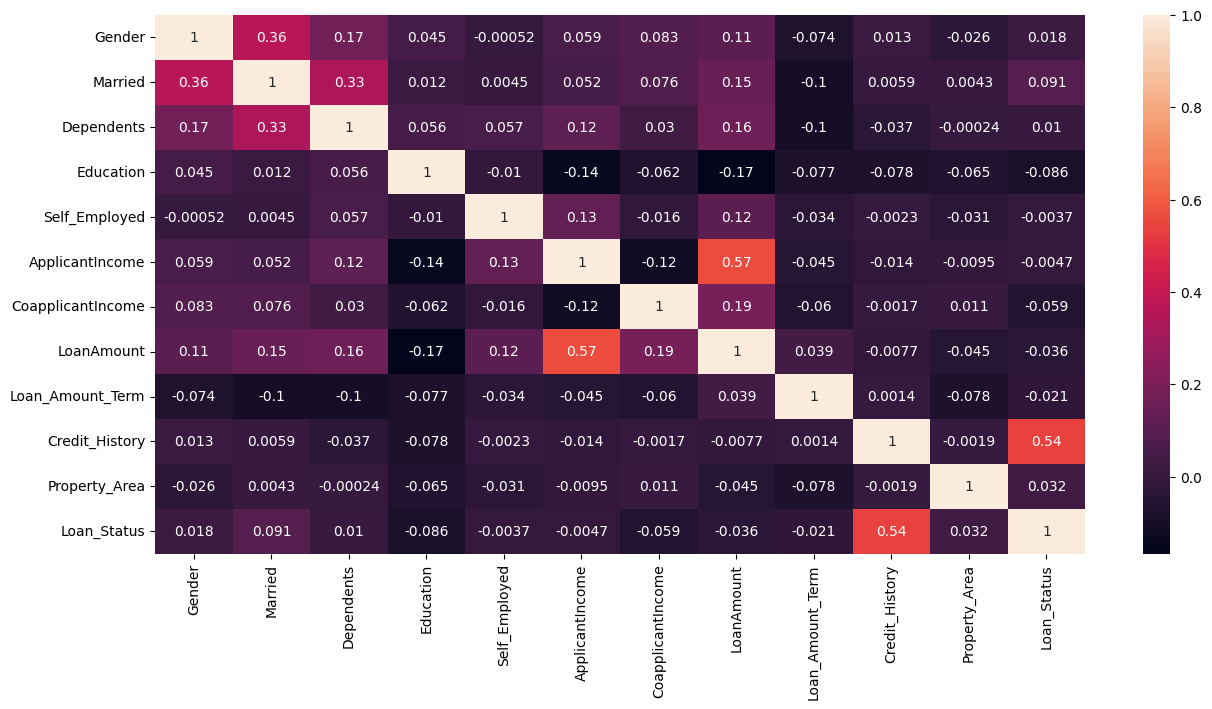

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True)

In [16]:
corr_matrix = df.corr()
corr_matrix['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

We see that the factors affecting the loan status are Credit History, Married or not followed by property are and gender. But the most important positively affecting factors is credit history as credit history is is important in banks to give any person loan. As we know it depends a lot on gender as seen in previous scenarios that males are less likely to save and return loan amount than women. Also the negative factors affective the loan
application status is the education level and Co-applicant income.

# Building the model

In [17]:
x = df1.drop('Loan_Status',axis=1)
y = df1["Loan_Status"]

In [18]:
x.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -1.963600
Loan_Amount_Term    -2.389680
dtype: float64

We see that the data is skewed and to bring the skewneww in the range of (-0.5,0.5) using power transform

In [19]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [20]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,-1.350003
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567


In [21]:
x.skew().sort_values(ascending = False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.389827
LoanAmount           0.024376
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Credit_History      -1.599912
Gender              -1.648795
dtype: float64

In [22]:
sk = x.skew()

In [23]:
sk[np.abs(sk)>0.25].all()

True

Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

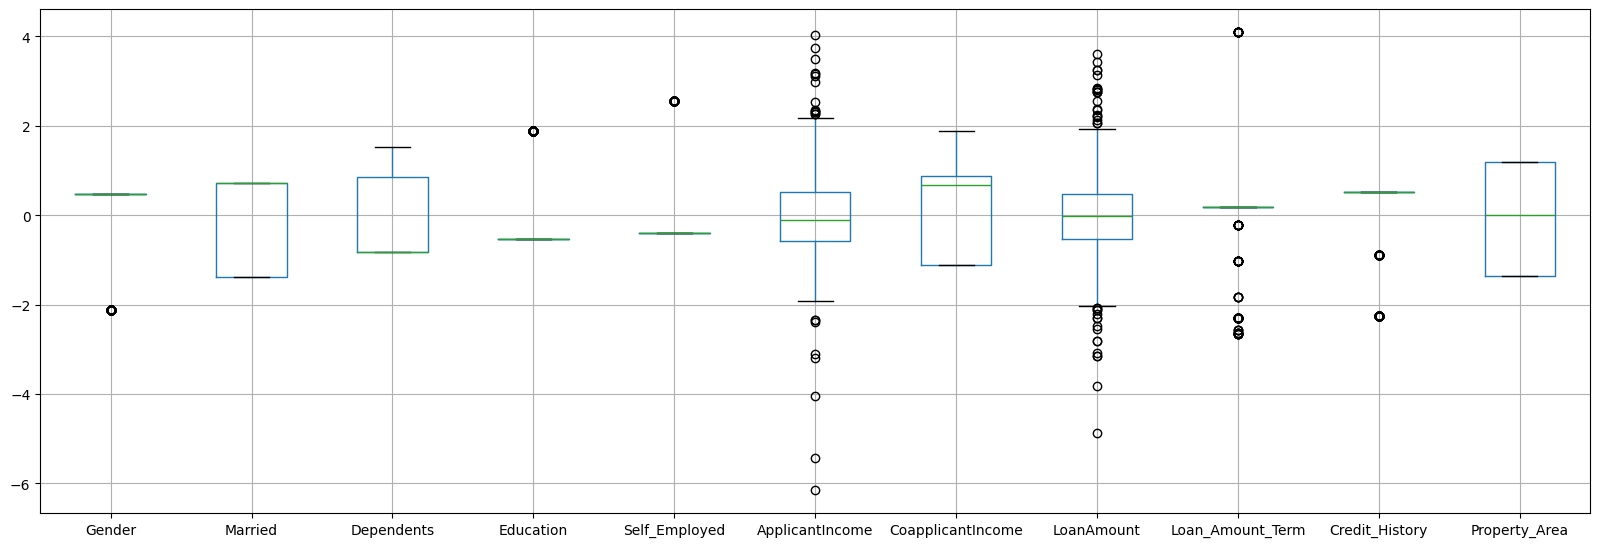

In [24]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [25]:
from scipy.stats import zscore
(np.abs(zscore(x))>3).all()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [26]:
new_df = pd.concat([x,y],axis=1)
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567,1.0
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003,0.0
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567,1.0
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567,1.0
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003,1.0
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,-1.350003,1.0
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567,1.0
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567,1.0


In [27]:
from scipy.stats import zscore
z = np.abs(zscore(new_df))
new_df = new_df[(z<3).all(axis=1)]

In [28]:
x = new_df.drop('Loan_Status', axis =1)
y = new_df['Loan_Status']

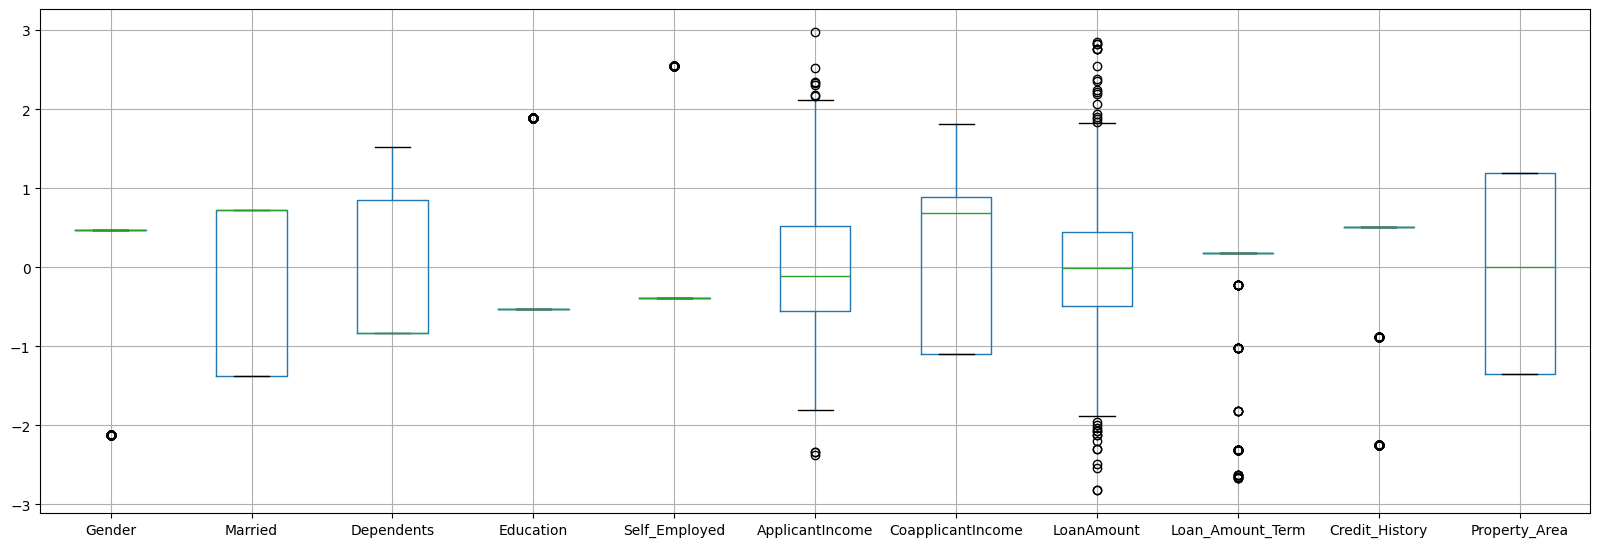

In [29]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

As we see there are no outliers, thus can proceed with modeling

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,-1.350003
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567


In [31]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 582, dtype: float64

To predict the loan application status we need to do logistic regression modelling as the value of loan_status is 0 or 1 thus binary mapping depending whether the loan application of a person gets approved or not

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [33]:
maxAcc=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random state',maxRS)

Best accuracy is 0.8974358974358975 on Random state 370


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=263)

In [35]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
277,0.472343,0.728816,-0.827104,-0.528362,-0.392601,-0.445446,0.704551,-0.972667,0.185905,0.514063,1.193567
427,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.566382,-1.102837,0.039936,0.185905,0.514063,0.002361
256,0.472343,-1.372089,-0.827104,1.892641,-0.392601,0.594080,-1.102837,-0.253446,0.185905,-2.247196,-1.350003
557,0.472343,0.728816,1.522278,-0.528362,2.547117,1.353283,-1.102837,1.430226,0.185905,0.514063,0.002361
140,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.318174,0.852167,0.716621,0.185905,0.514063,-1.350003
...,...,...,...,...,...,...,...,...,...,...,...
485,0.472343,0.728816,0.854259,1.892641,-0.392601,-1.205220,0.902105,0.009230,0.185905,0.514063,-1.350003
341,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.880235,-1.102837,-2.032830,0.185905,0.514063,-1.350003
160,0.472343,0.728816,-0.827104,1.892641,-0.392601,-1.289421,0.636406,-0.572762,0.185905,0.514063,0.002361
127,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,-0.095364,0.776780,0.235387,0.185905,0.514063,-1.350003


In [36]:
y_train

277    1.0
427    1.0
256    0.0
557    1.0
140    0.0
      ... 
485    1.0
341    0.0
160    1.0
127    1.0
511    1.0
Name: Loan_Status, Length: 465, dtype: float64

In [37]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
54,-2.117107,0.728816,0.854259,-0.528362,2.547117,1.532246,-1.102837,1.632941,0.185905,-2.247196,1.193567
81,0.472343,0.728816,0.854259,-0.528362,2.547117,-0.868443,-1.102837,0.235387,0.185905,0.514063,0.002361
220,0.472343,0.728816,-0.827104,-0.528362,-0.392601,-0.993730,-1.102837,-1.529432,0.185905,-2.247196,1.193567
559,-2.117107,0.728816,-0.827104,-0.528362,-0.392601,0.027674,0.884558,0.682743,0.185905,0.514063,0.002361
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
23,0.472343,0.728816,1.316702,1.892641,-0.392601,-0.315313,0.825863,-0.306458,0.185905,-2.247196,-1.350003
24,0.472343,0.728816,0.854259,-0.528362,-0.392601,-0.157043,0.961052,0.298426,0.185905,-0.883587,0.002361
412,0.472343,0.728816,-0.827104,1.892641,-0.392601,0.606734,-1.102837,1.058797,0.185905,-2.247196,-1.350003
253,0.472343,0.728816,0.854259,1.892641,-0.392601,-0.695091,1.256062,1.580116,-2.308570,0.514063,0.002361


In [38]:
y_test

54     0.0
81     1.0
220    0.0
559    1.0
0      1.0
      ... 
23     0.0
24     0.0
412    0.0
253    1.0
595    1.0
Name: Loan_Status, Length: 117, dtype: float64

In [39]:
x_train.shape

(465, 11)

In [40]:
y_train.shape

(465,)

In [41]:
x_test.shape

(117, 11)

In [42]:
y_test.shape

(117,)

Once we have splitted the data into train and test data we can check the accuracy using various classifers

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr =LR.predict(x_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 88.03418803418803
[[22  8]
 [ 6 81]]
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        30
         1.0       0.91      0.93      0.92        87

    accuracy                           0.88       117
   macro avg       0.85      0.83      0.84       117
weighted avg       0.88      0.88      0.88       117



# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt =DT.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 76.06837606837607
[[20 10]
 [18 69]]
              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        30
         1.0       0.87      0.79      0.83        87

    accuracy                           0.76       117
   macro avg       0.70      0.73      0.71       117
weighted avg       0.78      0.76      0.77       117



# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf =RF.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 88.88888888888889
[[23  7]
 [ 6 81]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        30
         1.0       0.92      0.93      0.93        87

    accuracy                           0.89       117
   macro avg       0.86      0.85      0.85       117
weighted avg       0.89      0.89      0.89       117



# Support Vector Classifier

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsv =svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy 88.88888888888889
[[21  9]
 [ 4 83]]
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76        30
         1.0       0.90      0.95      0.93        87

    accuracy                           0.89       117
   macro avg       0.87      0.83      0.85       117
weighted avg       0.89      0.89      0.89       117



# Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score

scr1 = cross_val_score(LR, x,y,cv=5)
print("Cross Validation score of Logistics Regression Model is",scr1.mean())

Cross Validation score of Logistics Regression Model is 0.7921161214264664


In [48]:
scr2 = cross_val_score(RF,x,y, cv=5)
print("Cross Validation Score of Random Forest Classifier is",scr2.mean())

Cross Validation Score of Random Forest Classifier is 0.7852785145888593


In [49]:
scr3 = cross_val_score(DT,x,y, cv=5)
print("Cross Validation Score of Decision Tree Classifier is",scr3.mean())

Cross Validation Score of Decision Tree Classifier is 0.6976274683171235


In [50]:
scr4 = cross_val_score(svc,x,y, cv=5)
print("Cross Validation Score of Support Vector Classifier is",scr4.mean())

Cross Validation Score of Support Vector Classifier is 0.8024462127910403


We can see that best accuracy is given by Logistic Regression of 86% and cross validation score is 79%.

# Hyper Parameters testing

In [51]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['sqrt','auto','log2'],
            'max_depth':range(1,50,3),
            'criterion':['gini','entropy']}

In [52]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9230769230769231

In [54]:
from sklearn.model_selection import RandomizedSearchCV

grid_param = {'min_samples_leaf':range(1,50,3),
              'min_samples_split':range(2,50,3),
              'max_depth':range(1,50,3),
              'criterion':['gini','entropy'],
              'splitter':['best','random']}

In [55]:
RCV = GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 16,
 'min_samples_split': 20,
 'splitter': 'random'}

In [56]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.8717948717948718

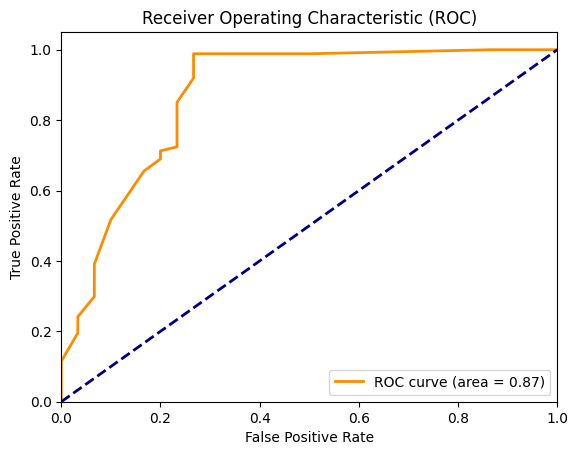

In [57]:
from sklearn.metrics import roc_curve, auc

# Assuming RCV.best_estimator_ is your trained classifier
probs = RCV.best_estimator_.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

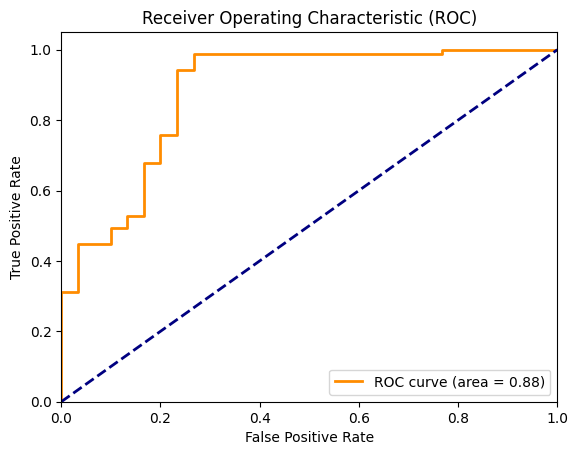

In [58]:
# Assuming GCV.best_estimator_ is your trained classifier
probs = GCV.best_estimator_.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [59]:
LRV = GridSearchCV(LR,param_grid = {'C':[0.001,0.01,0.1,1,10]})
LRV.fit(x_train,y_train)
LRV.best_params_

{'C': 0.01}

In [60]:
LRV_pred = LRV.best_estimator_.predict(x_test)
accuracy_score(y_test,LRV_pred)

0.9230769230769231

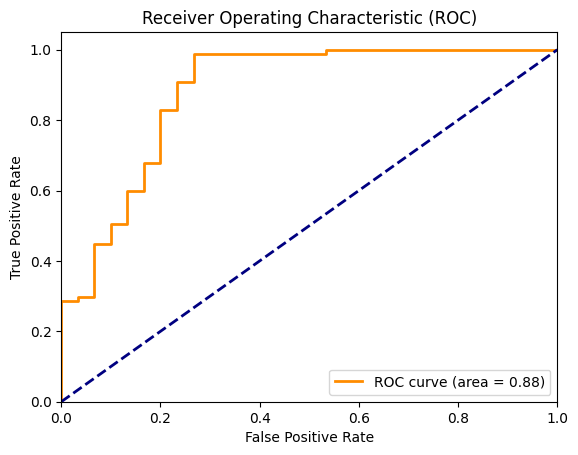

In [61]:
# Assuming LRV.best_estimator_ is your trained classifier
probs = LRV.best_estimator_.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Model accuracy is 92.3% through Logistic Regression and using hyper parameter testing also the accuracy is same. AUC accuracy is 88% using the Logistic Regression

In [62]:
import joblib
joblib.dump(LRV.best_estimator_,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

This model will help the bank to identify the loan defaulters.